<a href="https://colab.research.google.com/github/syedanida/Transformers-and-NLP/blob/main/Part_1_Basic_Inference_with_a_Pretrained_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Install necessary packages
!pip install -q tensorflow keras_nlp

In [14]:
# Import required libraries
import tensorflow as tf
import keras_nlp
import numpy as np
import matplotlib.pyplot as plt

In [15]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras NLP version: {keras_nlp.__version__}")

TensorFlow version: 2.18.0
Keras NLP version: 0.18.1


In [16]:
# Section 1: Text Classification with BERT
# -----------------------------------------
print("\n=== Text Classification with BERT ===")

# 1.1 Load a pre-trained BERT classifier for text classification
print("Loading pretrained BERT classifier...")

# Using KerasNLP's BERT classifier
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en_uncased",
    num_classes=2  # Binary classification
)
print("Model loaded successfully!")

# Display model structure
classifier.summary(line_length=100)

# 1.2 Define example texts for classification
examples = [
    "This movie was excellent! I loved it.",
    "The food was terrible and the service was worse.",
    "I feel neutral about this product.",
    "The book was okay, not great but not bad either.",
    "This has been an amazing experience, I'm so happy!"
]

# 1.3 Perform inference for sentiment classification
print("\nInference with BERT Classifier:")
results = classifier.predict(examples)

# Interpret results with softmax to get probabilities
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Apply softmax to convert logits to probabilities
probabilities = softmax(results)

print("\nClassification results:")
for i, example in enumerate(examples):
    print(f"Text: {example}")
    predicted_class = np.argmax(probabilities[i])
    confidence = probabilities[i][predicted_class]
    sentiment = "Positive" if predicted_class == 1 else "Negative"
    print(f"Prediction: {sentiment} (Confidence: {confidence:.4f})")
    print("-" * 50)


=== Text Classification with BERT ===
Loading pretrained BERT classifier...
Model loaded successfully!


Preprocessor: "bert_text_classifier_preprocessor_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                             ┃                                Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                           │                    Vocab size: 30,522 │
└──────────────────────────────────────────────────────────┴───────────────────────────────────────┘

Model: "bert_text_classifier_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)   │ (None, None)            │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ segment_ids (InputLayer)    │ (None, None)            │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ token_ids (InputLayer)      │ (None, None)            │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ bert_backbone               │ [(None, 768), (None,    │    109,482,240 │ padding_mask[0][0],     │
│ (BertBackbone)              │ None, 768)]             │                │ segment_ids[0][0],      │
│                             │                         │                │ token_ids[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ classifier_dropout          │ (None, 768)             │              0 │ bert_backbone[0][0]     │
│ (Dropout)                   │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ logits (Dense)              │ (None, 2)               │          1,538 │ classifier_dropout[0][… │
└─────────────────────────────┴─────────────────────────┴────────────────┴─────────────────────────┘

 Total params: 109,483,778 (417.65 MB)

 Trainable params: 109,483,778 (417.65 MB)

 Non-trainable params: 0 (0.00 B)


Inference with BERT Classifier:
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step

Classification results:
Text: This movie was excellent! I loved it.
Prediction: Negative (Confidence: 0.5150)
--------------------------------------------------
Text: The food was terrible and the service was worse.
Prediction: Negative (Confidence: 0.5358)
--------------------------------------------------
Text: I feel neutral about this product.
Prediction: Negative (Confidence: 0.5074)
--------------------------------------------------
Text: The book was okay, not great but not bad either.
Prediction: Negative (Confidence: 0.5742)
--------------------------------------------------
Text: This has been an amazing experience, I'm so happy!
Prediction: Negative (Confidence: 0.5287)
--------------------------------------------------



=== Using BERT for Sentence Embeddings ===

Generating embeddings for example sentences:
Embeddings shape: (4, 768)
Computing similarity between embeddings...

Similarity matrix:


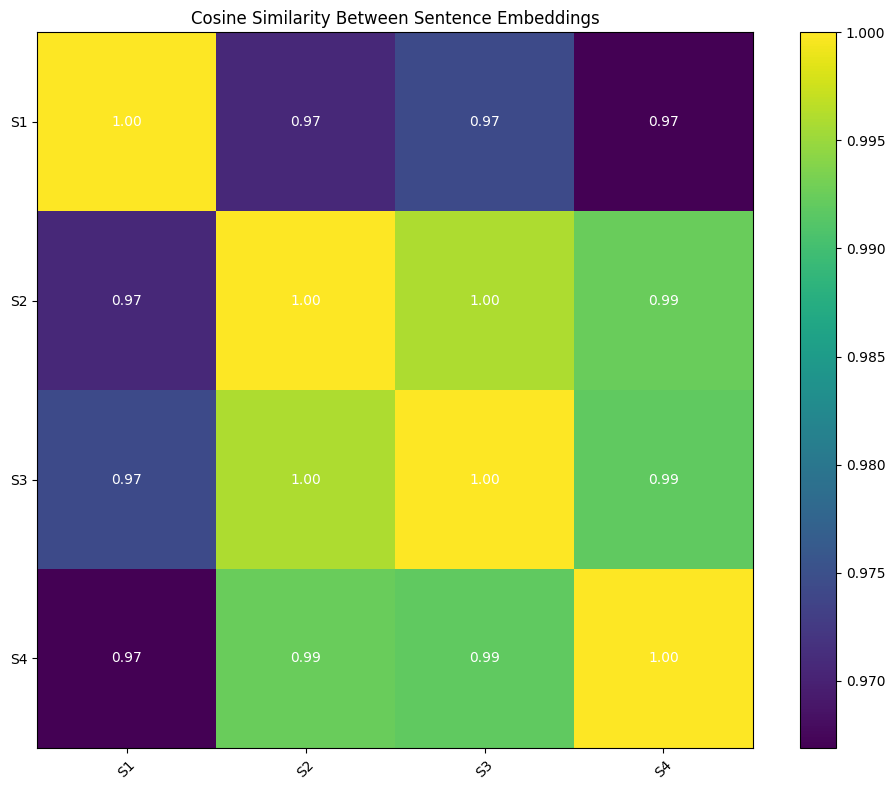


Sentences:
S1: I love machine learning.
S2: Neural networks are fascinating.
S3: I enjoy programming in Python.
S4: Natural language processing is an interesting field.


In [17]:
# Section 2: Using BERT for Sentence Embeddings
# ---------------------------------------------
print("\n=== Using BERT for Sentence Embeddings ===")

# 2.1 Create a separate BERT encoder for embeddings
# We'll use a simple classifier as a wrapper to get embeddings
embedding_model = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en_uncased",
    num_classes=2,  # Doesn't matter for embedding extraction
    classifier_activation=None  # No activation needed
)

# 2.2 Create a model that extracts only the pooled embeddings
def get_embeddings(texts):
    inputs = embedding_model.preprocessor(texts)
    # Pass through the backbone to get the pooled output
    backbone_outputs = embedding_model.backbone(inputs)
    # Return the pooled output (sentence representation)
    return backbone_outputs["pooled_output"].numpy()

# 2.3 Generate embeddings for example sentences
print("\nGenerating embeddings for example sentences:")
sentences = [
    "I love machine learning.",
    "Neural networks are fascinating.",
    "I enjoy programming in Python.",
    "Natural language processing is an interesting field."
]

# Get embeddings for all sentences
embeddings = get_embeddings(sentences)
print(f"Embeddings shape: {embeddings.shape}")

# 2.4 Visualize embeddings similarity
print("Computing similarity between embeddings...")

# Compute cosine similarity between embeddings
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

similarity_matrix = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    for j in range(len(sentences)):
        similarity_matrix[i, j] = cosine_similarity(embeddings[i], embeddings[j])

print("\nSimilarity matrix:")
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))], rotation=45)
plt.yticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}", ha='center', va='center', color='white')
plt.title('Cosine Similarity Between Sentence Embeddings')
plt.tight_layout()
plt.savefig('embedding_similarity.png')
plt.show()

print("\nSentences:")
for i, sentence in enumerate(sentences):
    print(f"S{i+1}: {sentence}")

In [18]:
# Section 3: Text Generation with a Pretrained Model (GPT-2)
# ---------------------------------------------------------
print("\n=== Text Generation with GPT-2 ===")

# 3.1 Load a pretrained GPT-2 model for text generation
print("Loading GPT-2 model for text generation...")
gpt2_generator = keras_nlp.models.GPT2CausalLM.from_preset("gpt2_base_en")

# 3.2 Generate text using the model
print("\nGenerating text:")
prompts = [
    "Artificial intelligence is",
    "The future of technology will",
    "Machine learning models can",
]

for prompt in prompts:
    print(f"Prompt: {prompt}")
    output = gpt2_generator.generate(prompt, max_length=100)
    print(f"Generated text: {output}")
    print("-" * 80)

# Section 4: Named Entity Recognition with BERT
# ---------------------------------------------
print("\n=== Named Entity Recognition with BERT ===")

# 4.1 Define a function to extract token-level embeddings
def get_token_embeddings(text):
    # Use the same embedding model created earlier
    # Preprocess the text
    inputs = embedding_model.preprocessor([text])
    # Get token-level outputs from the backbone
    outputs = embedding_model.backbone(inputs)
    # Return the sequence output (token embeddings)
    return outputs["sequence_output"].numpy()

# 4.2 Example text for NER demonstration
example_text = "Barack Obama was the president of the United States and he visited Berlin in Germany."
print(f"Example text for NER: {example_text}")

# 4.3 Get token embeddings for the example text
token_embeddings = get_token_embeddings(example_text)
print(f"Token embeddings shape: {token_embeddings.shape}")
print("Note: In a real implementation, these token embeddings would be fed to a trained NER classifier head.")


=== Text Generation with GPT-2 ===
Loading GPT-2 model for text generation...

Generating text:
Prompt: Artificial intelligence is
Generated text: Artificial intelligence is a field of research that is gaining momentum. It has been called "the future of robotics," but it is still in its infancy. Artificial intelligence has been a field of research for decades, and has been used to solve many of the world's problems. But there is a lot of work to be done, and there is still a lot of work to be done.

A new research paper, published today in the journal Nature, shows that artificial intelligence could help humans
--------------------------------------------------------------------------------
Prompt: The future of technology will
Generated text: The future of technology will not be a simple one. As the world's leading computer-science and engineering company continues to expand its workforce, so too will technology itself.

The company's latest report on its progress in the field of com